## Com gestionar dades de F1 amb fastf1

In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

plotting.setup_mpl()

In [2]:
# Crea una carpeta per la cache
# mkdir .cache

# Activa la cache
ff1.Cache.enable_cache('.cache') 

In [3]:
# Pots triar un esdeveniment, una sessió i un voltes
shanghai = ff1.get_event(2019, 'Shanghai')
shanghai

RoundNumber                                                   3
Country                                                   China
Location                                               Shanghai
OfficialEventName    FORMULA 1 HEINEKEN CHINESE GRAND PRIX 2019
EventDate                                   2019-04-14 00:00:00
EventName                                    Chinese Grand Prix
EventFormat                                        conventional
Session1                                             Practice 1
Session1Date                                2019-04-12 00:00:00
Session2                                             Practice 2
Session2Date                                2019-04-12 00:00:00
Session3                                             Practice 3
Session3Date                                2019-04-13 00:00:00
Session4                                             Qualifying
Session4Date                                2019-04-13 00:00:00
Session5                                

In [4]:
# Recorda carregar les dades de la sessió
race = shanghai.get_session('R')
race.load()

core           INFO 	Loading data for Chinese Grand Prix - Race [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '5', '33', '16', '10', '3', '11', '7', '23', '8', '18', '20', '55', '99', '63', '88', '4', '26', '27']


In [5]:
laps = race.laps
laps.columns

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Stint', 'LapStartTime', 'Team',
       'Driver', 'TrackStatus', 'IsAccurate', 'LapStartDate'],
      dtype='object')

In [6]:
nlaps = max(laps['LapNumber'])
nlaps

56

In [7]:
drivers = laps["Driver"].unique()
drivers

array(['HAM', 'BOT', 'VET', 'VER', 'LEC', 'GAS', 'RIC', 'PER', 'RAI',
       'ALB', 'GRO', 'STR', 'MAG', 'SAI', 'GIO', 'RUS', 'KUB', 'NOR',
       'KVY', 'HUL'], dtype=object)

In [8]:
# Pots carregar la telemetria de qualsevol corredor
HAM = laps.pick_driver('HAM')
HAM.get_telemetry().columns

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')

In [9]:
# Pots triar la telemetria d'una volta
lap_num = 2
lap = HAM.loc[laps['LapNumber'] == lap_num].get_telemetry()
lap

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2019-04-14 06:15:15.657,0 days 00:35:13.782000,,NaN,0 days 00:00:00,11052,234,6,95,False,1,interpolation,0.121585,0.000022,OnTrack,-1285,-1846,139
3,2019-04-14 06:15:15.668,0 days 00:35:13.793000,,NaN,0 days 00:00:00.011000,11093,235,6,96,False,1,car,0.845278,0.000156,OnTrack,-1294,-1848,139
4,2019-04-14 06:15:15.886,0 days 00:35:14.011000,,NaN,0 days 00:00:00.229000,11149,237,6,95,False,1,pos,15.293994,0.002818,OnTrack,-1441,-1880,140
5,2019-04-14 06:15:15.948,0 days 00:35:14.073000,,NaN,0 days 00:00:00.291000,11205,239,6,95,False,1,car,19.434167,0.003581,OnTrack,-1473,-1886,140
6,2019-04-14 06:15:16.186,0 days 00:35:14.311000,,NaN,0 days 00:00:00.529000,11263,240,6,96,False,1,pos,35.432473,0.006530,OnTrack,-1568,-1907,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2019-04-14 06:17:03.748,0 days 00:37:01.873000,,NaN,0 days 00:01:48.091000,11650,255,6,100,False,1,car,5374.060556,0.990368,OnTrack,895,-1370,140
804,2019-04-14 06:17:03.988,0 days 00:37:02.113000,,NaN,0 days 00:01:48.331000,10668,259,7,100,False,1,pos,5391.327222,0.993550,OnTrack,693,-1414,141
805,2019-04-14 06:17:04.229,0 days 00:37:02.354000,,NaN,0 days 00:01:48.572000,10706,261,7,100,False,0,car,5408.799722,0.996770,OnTrack,481,-1459,140
806,2019-04-14 06:17:04.288,0 days 00:37:02.413000,,NaN,0 days 00:01:48.631000,10767,262,7,100,False,0,pos,5413.106528,0.997564,OnTrack,429,-1471,140


In [10]:
# Ací teniu algunes funcions ùtils per mostrar dades de telemetria

def plot_lap_track(lap, field):
    x = np.array(lap['X'].values)
    y = np.array(lap['Y'].values)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    var = lap[field].to_numpy().astype(float)
    v_min = np.min(var)
    v_max = np.max(var)

    cmap = plt.colormaps['jet']
    lc = LineCollection(segments, norm=plt.Normalize(v_min, v_max), cmap=cmap)
    lc.set_array(var)
    lc.set_linewidth(2)

    plt.rcParams['figure.figsize'] = [8, 4]
        
    plt.gca().add_collection(lc)
    plt.axis('equal')


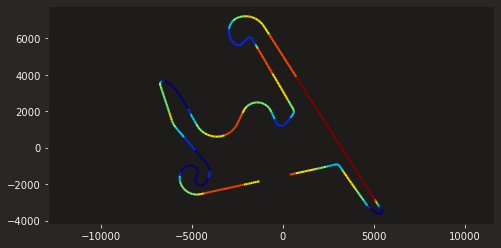

In [11]:
plot_lap_track(lap, 'nGear')

In [12]:
def plot_lap_data(laps, plot_title):
    plot_size = [15,15]
    plot_ratios = [3, 2, 1, 1, 2, 1]

    plt.rcParams['figure.figsize'] = plot_size

    # Create subplots with different sizes
    fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})

    # Set the plot title
    ax[0].title.set_text(plot_title)

    # Speed trace
    for lap in laps:
        ax[0].plot(lap['Distance'], lap['Speed'], label="HAM")
    ax[0].set(ylabel='Speed')

    # Throttle trace
    for lap in laps:
        ax[1].plot(lap['Distance'], lap['Throttle'], label="HAM")
    ax[1].set(ylabel='Throttle')

    # Brake trace
    for lap in laps:
        ax[2].plot(lap['Distance'], lap['Brake'], label="HAM")
    ax[2].set(ylabel='Brake')

    # Gear trace
    for lap in laps:
        ax[3].plot(lap['Distance'], lap['nGear'], label="HAM")
    ax[3].set(ylabel='Gear')

    # RPM trace
    for lap in laps:
        ax[4].plot(lap['Distance'], lap['RPM'], label="HAM")
    ax[4].set(ylabel='RPM')

    # DRS trace
    for lap in laps:
        ax[5].plot(lap['Distance'], lap['DRS'], label="HAM")
    ax[5].set(ylabel='DRS')
    ax[5].set(xlabel='Lap distance (meters)')


    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for a in ax.flat:
        a.label_outer()
    
    plt.show()

In [13]:
# Podem mirar moltes dades juntes
lap_list = []
for drv in ['HAM']:
    for n in range(1, nlaps + 1):
        lap = laps.pick_driver(drv).loc[laps['LapNumber'] == n].get_telemetry()
        lap_list.append(lap)

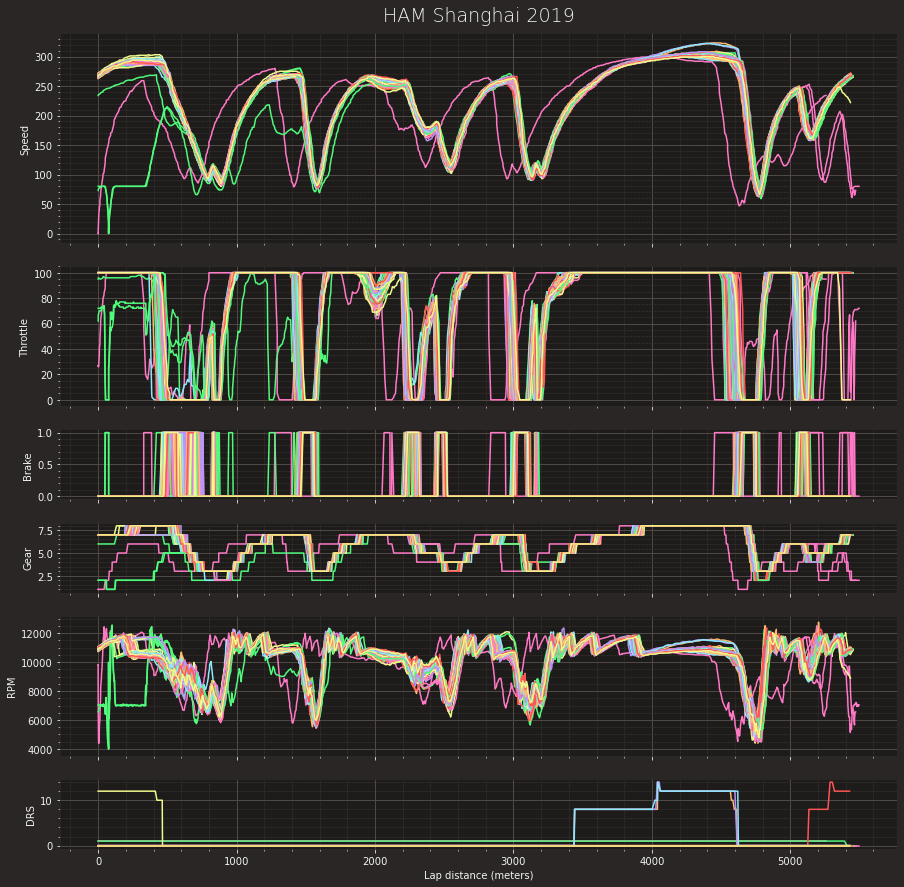

In [14]:
plot_lap_data(lap_list, "HAM Shanghai 2019")

In [15]:
# Podem seleccionar una part del circuit

def get_region(lap, x0, x1, y0, y1):
    x0, x1 = np.sort([x0, x1])
    y0, y1 = np.sort([y0, y1])
    region = lap.loc[((lap.X > x0) & (lap.X < x1) & (lap.Y > y0) & (lap.Y < y1))]
    return region

def distance(lap, start, end):
    a = (end[1] - start[1]) / (end[0] - start[0])
    b = start[1] - a * start[0]
    div = np.sqrt(a**2 + 1)
    
    dis = (a * lap.X - lap.Y + b).abs() / div
    return dis

def get_straight(lap, start, end, width):
    straight = lap.loc[distance(lap, start, end) < width]
    return straight

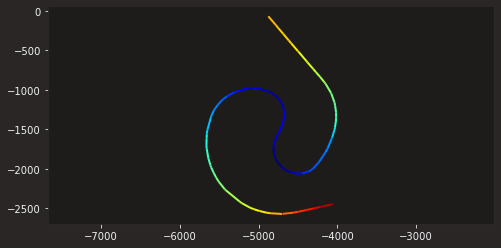

In [16]:
# Sector 1
lap2 = lap_list[2]
sector = get_region(lap2, -4000, -7000, -3000, 0)
plot_lap_track(sector, 'Speed')

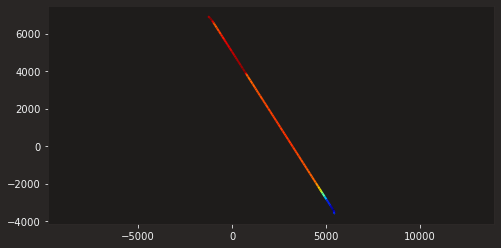

In [17]:
# Recta de Shanghai
start = [-1188, 6839]
end = [5452, -3573]
lap2 = lap_list[2]
recta = get_straight(lap2, start, end, 50)
plot_lap_track(recta, 'RPM')

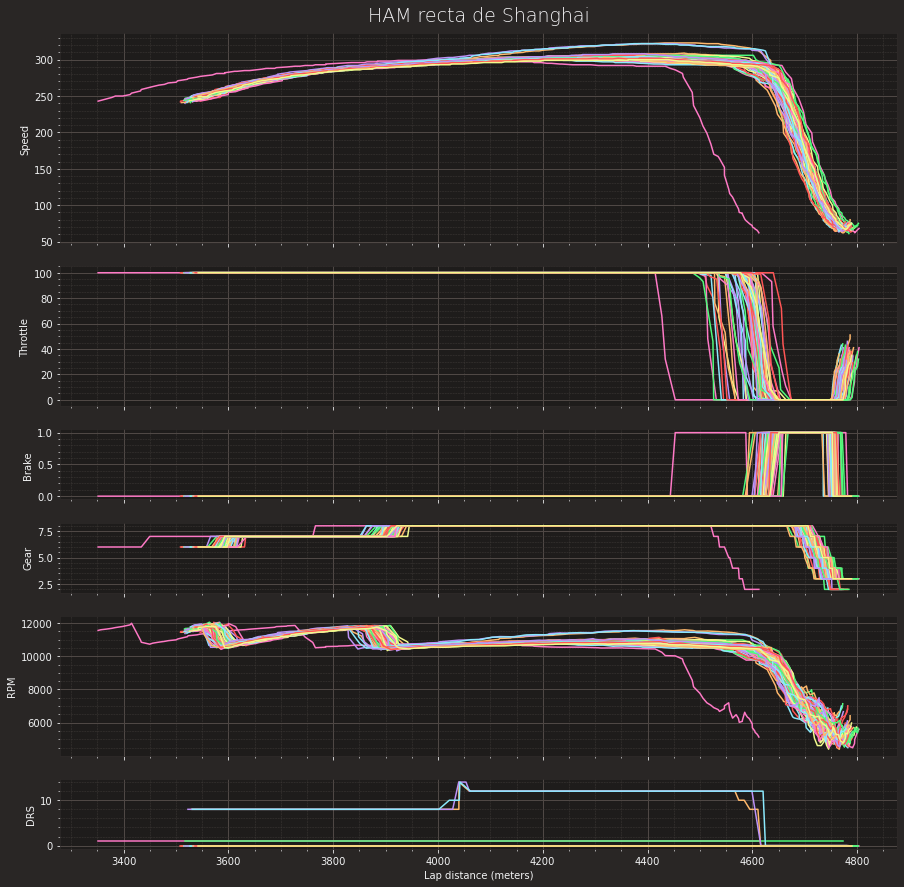

In [18]:
r_list = []
for lap in lap_list:
    lapr = get_straight(lap, start, end, 50)
    r_list.append(lapr)
plot_lap_data(r_list, "HAM recta de Shanghai")